# Objective

Analyze the dataset given and examine the relationsips between different variables in people with and without heart disease.

Overall Workflow
- frame the problem
- understand the dataset
- conduct exploratory data analysis

# Context


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.
<br> 
It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset
of 14 of them.
<br>
The "target" field refers to the presence of heart disease in the patient. 
<br>
It is integer valued 0 = no disease and 1 = disease.

# Content and  Attribute Information:


1. age
2. sex (1 = male)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database,
replaced with dummy values.

# Framing the problem

A dataset was given with 14 columns containing different health related information about a person. 
<br>
We need to predict the target column (has heart disease) using the other 13 columns. 
<br>
This is a supervised classification problem.

# Importing libraries and loading the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

# Previewing the data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape

(1025, 14)

There are 1025 patient records in this dataset.

# Generating the summary and descriptive statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

## Finding out the number of people with heart disease and the ones that do not

In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [9]:
df['target'].value_counts(normalize = True)*100


1    51.317073
0    48.682927
Name: target, dtype: float64

Looks like it is quite an even split of 51% for yes and 49% for no.

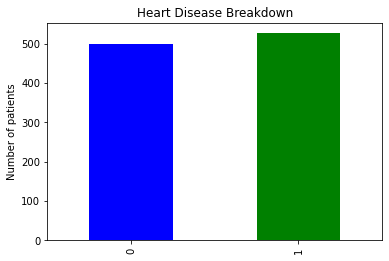

In [10]:
#Visualizing the data in a bar chart

df['target'].value_counts().sort_values().plot(kind ='bar',color =['blue','green'])
plt.title('Heart Disease Breakdown')
plt.ylabel('Number of patients')
plt.show()

## Finding the breakdown of males vs females in the dataset

In [11]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

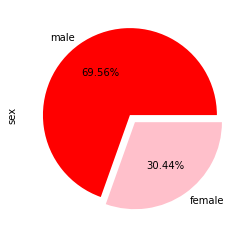

In [12]:
labels = ['male','female']
colors = ['red','pink']
explode = (0,0.10)
df['sex'].value_counts().plot(kind='pie',labels = labels, colors = colors,autopct='%1.2f%%',explode = explode)
plt.show()

## Do more males or females have heart disease?

In [13]:
#previewing the data again
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
#creating a crosstab
pd.crosstab(index=df['sex'],columns=df['target'])

target,0,1
sex,,
0,86,226
1,413,300


In [15]:
#creating a crosstab
pd.crosstab(index=df['sex'],columns=df['target'],normalize = 'index')

target,0,1
sex,,
0,0.275641,0.724359
1,0.579243,0.420757


There are more male patients than female patients and although there is a higher
absolute number of males with heart disease, 42% of men in the dataset have heart
disease compared to 72% in women. 

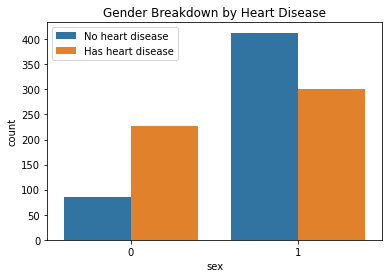

In [16]:
#visualizing the crosstab
sns.countplot(x='sex',data =df,hue ='target')
plt.legend(['No heart disease','Has heart disease'])
plt.title('Gender Breakdown by Heart Disease')
#plt.xticks(['female', 'male'])
plt.show()

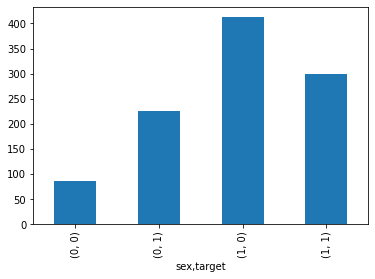

In [17]:
# Alternative method - groupby sex annd target

df.groupby(['sex','target']).size().plot(kind='bar')
plt.show()

## Understanding the distribution of different types of chest pains

In [18]:
df['cp'].value_counts().sort_index()

0    497
1    167
2    284
3     77
Name: cp, dtype: int64

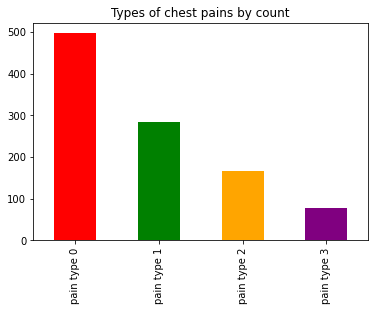

In [19]:
# visualizing this information in a bar chart
fig = df['cp'].value_counts().plot(kind = 'bar', color = ['red','green','orange','purple'])
fig.set_xticklabels(labels = ['pain type 0','pain type 1','pain type 2','pain type 3'])
plt.title('Types of chest pains by count')
plt.show()

## Getting the breakdown of chest pains by sex

In [20]:
#creating a crosstab
pd.crosstab(index=df['sex'],columns=df['cp'])

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


In [21]:
#creating a crosstab and display it in percentages
pd.crosstab(index=df['sex'],columns=df['cp'],normalize = 'index')

cp,0,1,2,3
sex,,,,
0,0.426282,0.182692,0.349359,0.041667
1,0.510519,0.154278,0.245442,0.089762


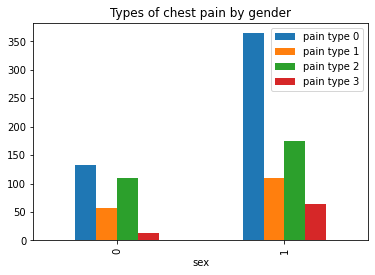

In [22]:
#visualizing the data from the crosstab
fig = pd.crosstab(index=df['sex'],columns=df['cp']).plot(kind = 'bar')
plt.title('Types of chest pain by gender')
plt.legend(['pain type 0','pain type 1','pain type 2','pain type 3'])
plt.show()

## Discovering the most common type of chest pain that occur in people with heart disease

In [23]:
#create a crosstab
pd.crosstab(index=df['target'],columns=df['cp'])

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


In [24]:
#create a crosstab displaying percentages
pd.crosstab(index=df['target'],columns=df['cp'],normalize='index')

cp,0,1,2,3
target,,,,
0,0.751503,0.066132,0.130261,0.052104
1,0.231939,0.254753,0.416350,0.096958


It seems that the most occuring chest pain for people with heart disease is pain type 2.

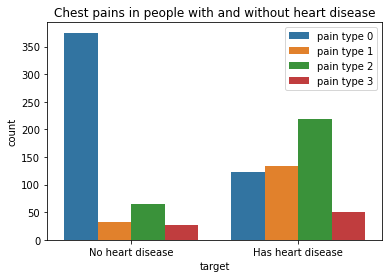

In [25]:
#visualizing the cross tab in a bar chart
fig = sns.countplot(x='target',data=df, hue = 'cp')
plt.title('Chest pains in people with and without heart disease')
fig.set_xticklabels(labels = ['No heart disease','Has heart disease'])
plt.legend(['pain type 0','pain type 1','pain type 2','pain type 3'])
plt.show()

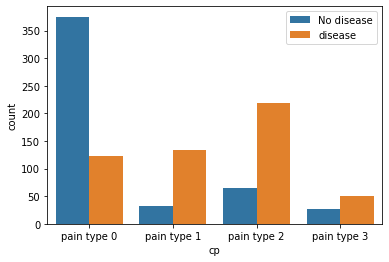

In [26]:
#alternative visualization by pain type as the index
fig = sns.countplot(x = 'cp', data = df, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

## Exploring the distribution of age in the dataset

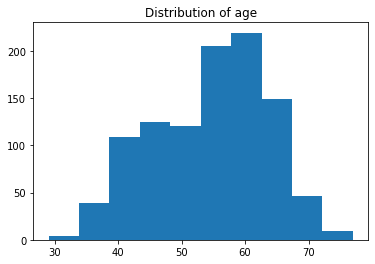

In [27]:
#create a distribution plot(histogram)- plt
plt.title('Distribution of age')
plt.hist(df['age'],bins=10)
plt.show()

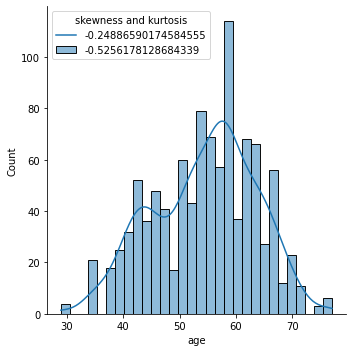

In [28]:
#create a distribution plot(histogram)- sns
sns.displot( x = 'age', data = df, bins = 30, kde = True)
skewness=str(df["age"].skew())
kurtosis=str(df["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

## Exploring the distribution of maximum heart rate in patients

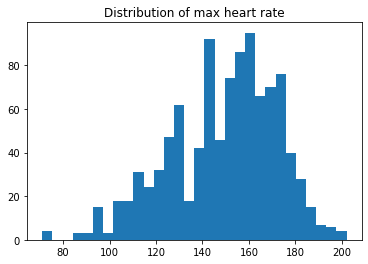

In [29]:
#create a distribution plot(histogram)- plt
plt.title('Distribution of max heart rate')
plt.hist(df['thalach'],bins=30)
plt.show()

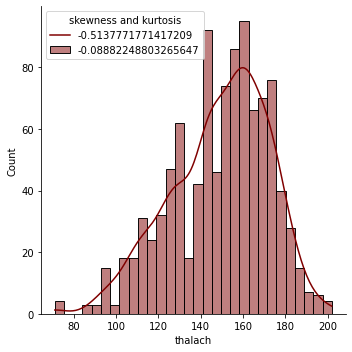

In [30]:
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'maroon')
skewness=str(df["thalach"].skew())
kurtosis=str(df["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

## Exploring the relationship between age and maximum heart rate for people with and without heart disease

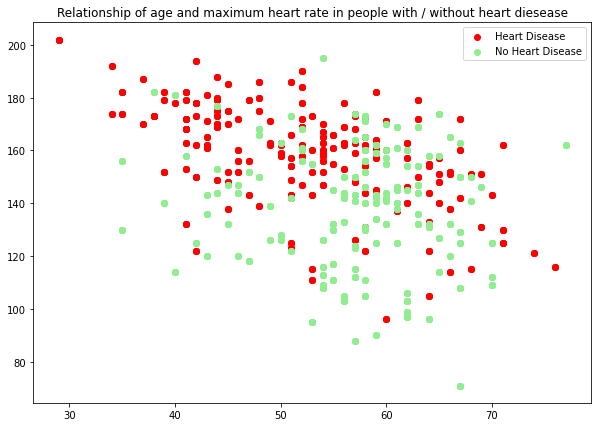

In [31]:
#creating a scatter plot - plt

plt.figure(figsize=(10,7))

#plotting people who have heart diseases
plt.scatter(df['age'][df['target']==1],df['thalach'][df['target']==1],c='red')

#plotting people who do not have heart diseases
plt.scatter(df['age'][df['target']!=1],df['thalach'][df['target']!=1],c='lightgreen')
plt.legend(['Heart Disease','No Heart Disease'])
plt.title('Relationship of age and maximum heart rate in people with / without heart diesease')

plt.show()

## Using a density curve to visualize the distribution of age and max heart rate

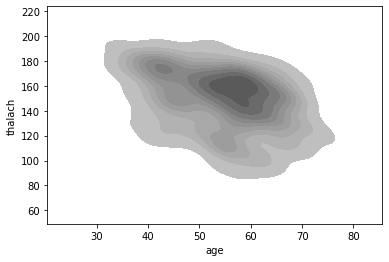

In [32]:
sns.kdeplot(x='age',y='thalach', data = df, color = 'grey',fill = 'True'); #thalach refers to max heart rate

## Examining the max heart rate in people with and without heart disease

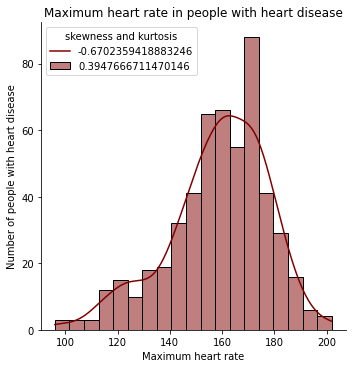

In [33]:
#using a distribution plot for people with heart disease vs max heart rate

sns.displot(x = df['thalach'][df['target']==1], data = df, kde = True, color= 'maroon')
skewness=str(df['thalach'][df['target']==1].skew())
kurtosis=str(df['thalach'][df['target']==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart rate in people with heart disease")
plt.xlabel("Maximum heart rate")
plt.ylabel("Number of people with heart disease");

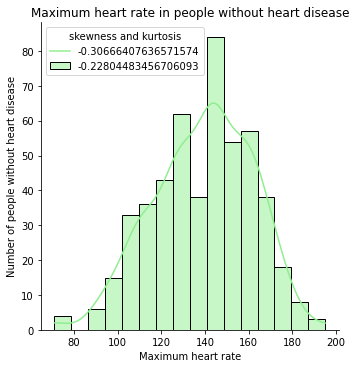

In [34]:
#using a distribution plot for people without heart disease vs max heart rate

sns.displot(x = df['thalach'][df['target']==0], data = df, kde = True, color= 'lightgreen')
skewness=str(df['thalach'][df['target']==0].skew())
kurtosis=str(df['thalach'][df['target']==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart rate in people without heart disease")
plt.xlabel("Maximum heart rate")
plt.ylabel("Number of people without heart disease");

## Exploring the effect of Age vs Serum Cholesterol in people with heart disease

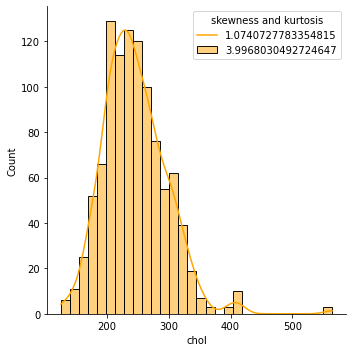

In [35]:
# Distribution plot for serum cholesterol vs count

sns.displot(x = 'chol', data = df, bins = 30, kde = True, color = 'orange')
skewness=str(df['chol'].skew())
kurtosis=str(df['chol'].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

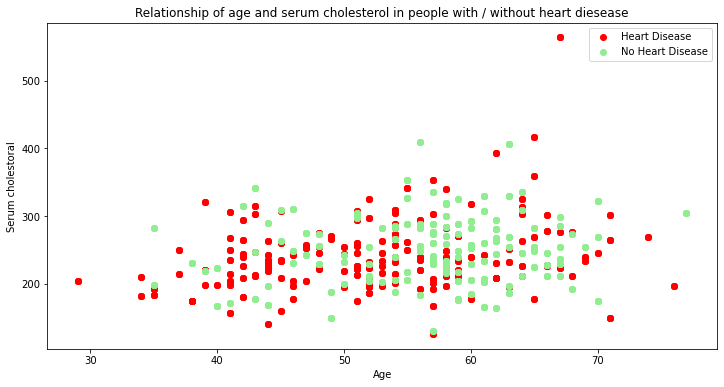

In [36]:
#Scatter plot for age and serum cholesterol

#creating a scatter plot - plt

plt.figure(figsize=(12,6))

#plotting people who have heart diseases
plt.scatter(df['age'][df['target']==1],df['chol'][df['target']==1],c='red')

#plotting people who do not have heart diseases
plt.scatter(df['age'][df['target']!=1],df['chol'][df['target']!=1],c='lightgreen')
plt.legend(['Heart Disease','No Heart Disease'])
plt.title('Relationship of age and serum cholesterol in people with / without heart diesease')
plt.xlabel("Age")
plt.ylabel("Serum cholestoral");

plt.show()

## Using a density curve to visualize the distribution of age and Serum Cholesterol

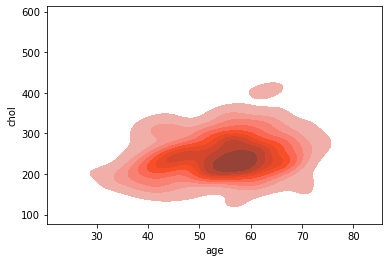

In [37]:
sns.kdeplot(x = 'age', y = 'chol', data = df, color = 'salmon',fill = 'True');

## Exploring the distribution of people with heart disease and their Serum Cholesterol levels

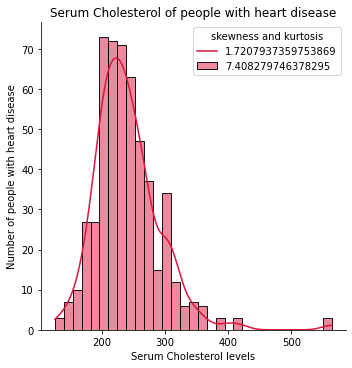

In [38]:
#distribution plot

sns.displot(x = df['chol'][df['target']==1], data = df, kde = True, color= 'crimson')
skewness=str(df['chol'][df['target']==1].skew())
kurtosis=str(df['chol'][df['target']==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholesterol of people with heart disease")
plt.xlabel("Serum Cholesterol levels")
plt.ylabel("Number of people with heart disease");

## Comparing the previous result with the distribution of people without heart disease and their Serum Cholesterol levels

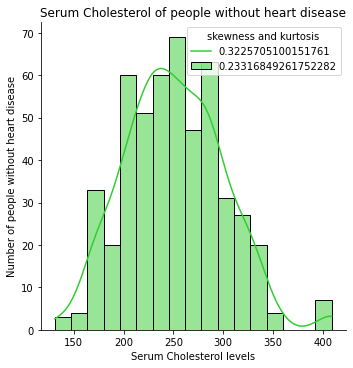

In [39]:
#distribution plot

sns.displot(x = df['chol'][df['target']==0], data = df, kde = True, color= 'limegreen')
skewness=str(df['chol'][df['target']==0].skew())
kurtosis=str(df['chol'][df['target']==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholesterol of people without heart disease")
plt.xlabel("Serum Cholesterol levels")
plt.ylabel("Number of people without heart disease");

## Finding out which sex has experienced more exercise induced angina

In [40]:
# using a crosstab
pd.crosstab(index = df['sex'],columns = df['exang'])

exang,0,1
sex,,
0,238,74
1,442,271


In [41]:
# using a crosstab to display the percentages
pd.crosstab(index = df['sex'],columns = df['exang'],normalize = 'index')*100

exang,0,1
sex,,
0,76.282051,23.717949
1,61.991585,38.008415


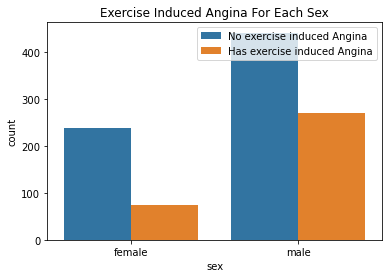

In [42]:
# visualizing the data in a countplot

ax = sns.countplot(x = 'sex', hue = 'exang', data = df)
plt.title('Exercise Induced Angina For Each Sex')
plt.legend(['No exercise induced Angina', 'Has exercise induced Angina'])
ax.set_xticklabels(labels = ['female','male'])
plt.show()

## Finding out which sex has fasting blood sugar > 120 mg/dl?

In [43]:
df['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

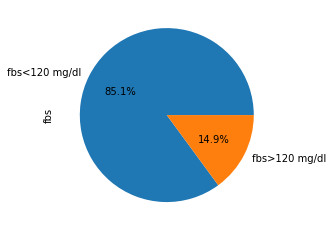

In [44]:
# visualizing the percentage of people with fasting blood sugar > 120 mg/dl with a pie chart
labels = 'fbs<120 mg/dl', 'fbs>120 mg/dl'
df['fbs'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',labels = labels)
plt.show()

In [45]:
pd.crosstab(index = df['sex'],columns = df['fbs'])

fbs,0,1
sex,,
0,270,42
1,602,111


In [46]:
pd.crosstab(index = df['sex'],columns = df['fbs'],normalize = 'index')*100

fbs,0,1
sex,,
0,86.538462,13.461538
1,84.431978,15.568022


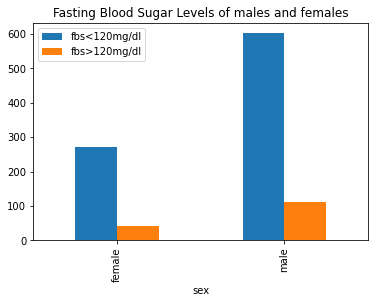

In [47]:
#comparing the fasting blood sugar levels in males and females

fig = pd.crosstab(index = df['sex'],columns = df['fbs']).plot(kind = 'bar')
plt.title('Fasting Blood Sugar Levels of males and females')
fig.set_xticklabels(labels=['female', 'male'])
plt.legend(['fbs<120mg/dl', 'fbs>120mg/dl'])
plt.show()

## Finding out if there is any correlation in the dataset

In [48]:
correlation_matrix = df.corr()

In [49]:
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


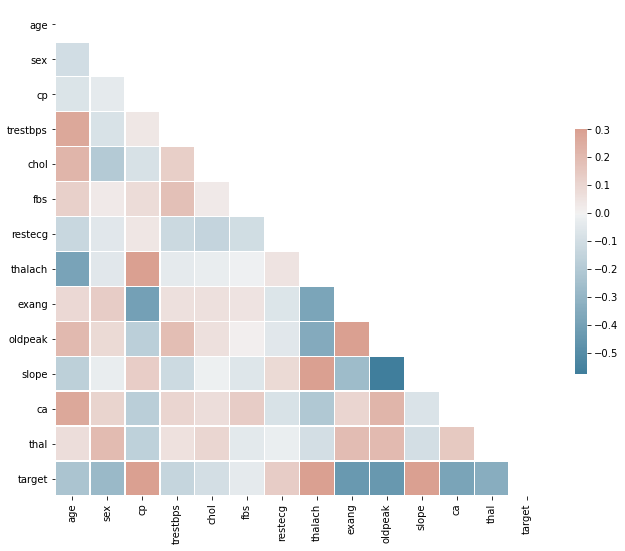

In [50]:
#visualizing the correlation matrix with a heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});